In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
clean_airline_df = pd.read_csv("/Users/talhakimi/data-science-flights-project/Data Procces/Cleaned_AllFlightsData.csv")
clean_airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276267 entries, 0 to 276266
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Website            276267 non-null  object 
 1   Snapshot date      276267 non-null  object 
 2   Airline            276267 non-null  object 
 3   Price              276267 non-null  int64  
 4   TTT                276267 non-null  int64  
 5   LOS                276267 non-null  int64  
 6   Origin             276267 non-null  object 
 7   Destination        276267 non-null  object 
 8   Departure date     276267 non-null  object 
 9   Departure Airport  276267 non-null  object 
 10  Departure Time     276267 non-null  object 
 11  Layover            276267 non-null  float64
 12  Stops              276267 non-null  int64  
 13  Return date        276267 non-null  object 
 14  Arrival Airport    276267 non-null  object 
 15  Arrival Time       276267 non-null  object 
 16  Du

In [14]:
def remove_outliers(df):
    grouped = df.groupby(['Origin', 'Destination'])
    rows_to_keep = []
    
    for (origin, destination), group in grouped:
        Q1 = group['Price'].quantile(0.25)
        Q3 = group['Price'].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered_group = group[(group['Price'] >= lower_bound) & (group['Price'] <= upper_bound)]
        rows_to_keep.append(filtered_group)
    cleaned_df = pd.concat(rows_to_keep)
    
    return cleaned_df

cleaned_df = remove_outliers(clean_airline_df)
cleaned_df.head()
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275293 entries, 0 to 267026
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Website            275293 non-null  object 
 1   Snapshot date      275293 non-null  object 
 2   Airline            275293 non-null  object 
 3   Price              275293 non-null  int64  
 4   TTT                275293 non-null  int64  
 5   LOS                275293 non-null  int64  
 6   Origin             275293 non-null  object 
 7   Destination        275293 non-null  object 
 8   Departure date     275293 non-null  object 
 9   Departure Airport  275293 non-null  object 
 10  Departure Time     275293 non-null  object 
 11  Layover            275293 non-null  float64
 12  Stops              275293 non-null  int64  
 13  Return date        275293 non-null  object 
 14  Arrival Airport    275293 non-null  object 
 15  Arrival Time       275293 non-null  object 
 16  Duratio

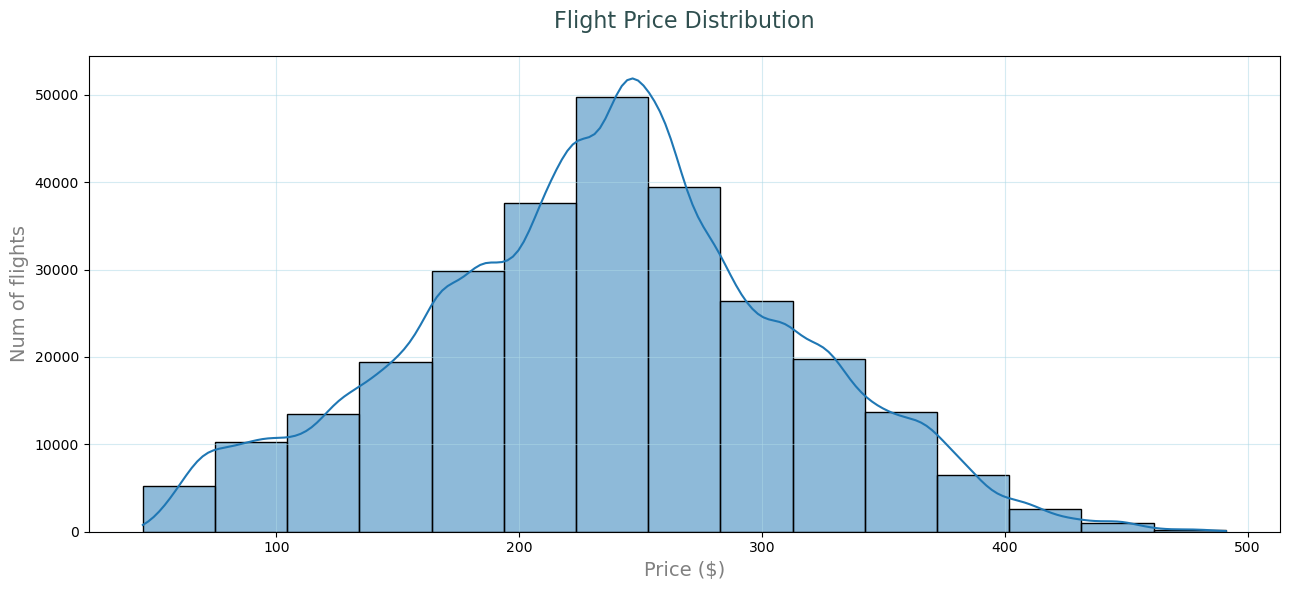

In [15]:
plt.figure(figsize=(13, 6))
sns.histplot(cleaned_df['Price'], bins=15, kde=True)
plt.title('Flight Price Distribution', fontsize=16, color='darkslategray', pad=20)
plt.xlabel('Price ($)', fontsize=14, color='gray')
plt.ylabel('Num of flights', fontsize=14, color='gray')
plt.grid(True, linestyle='-', color='lightblue', alpha=0.5)
plt.tight_layout()
plt.show()


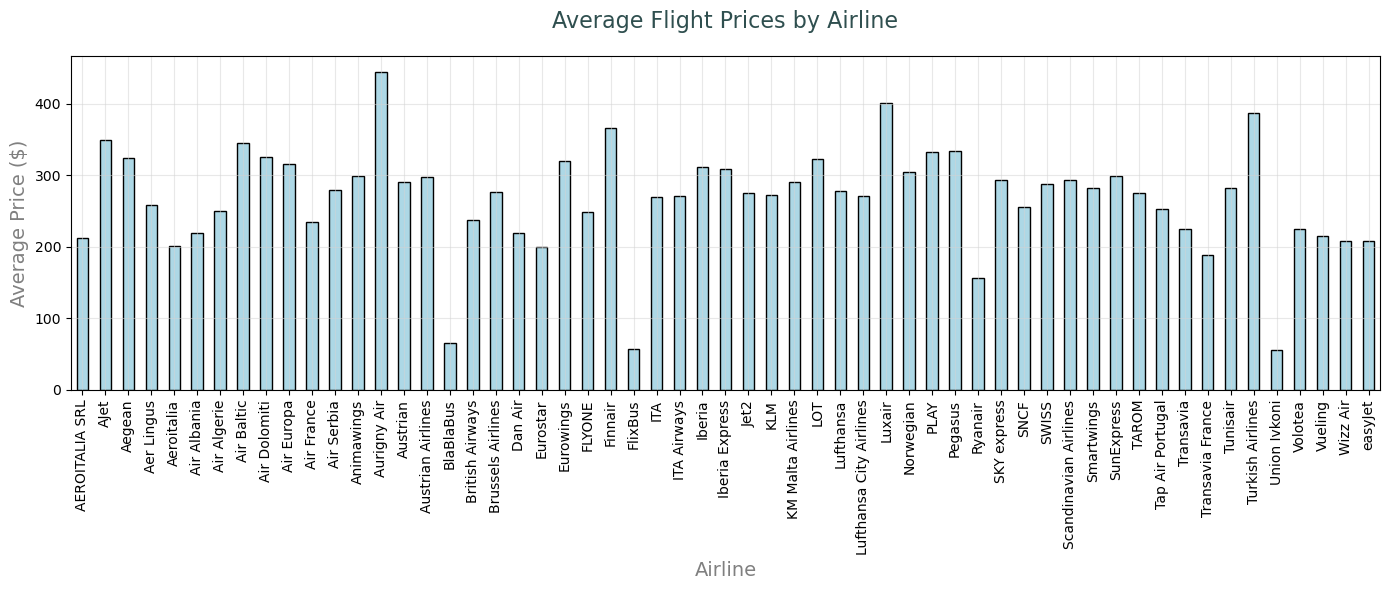

In [16]:
avg_prices = cleaned_df.groupby('Airline')['Price'].mean()
plt.figure(figsize=(14, 6))
avg_prices.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Average Flight Prices by Airline', fontsize=16, color='darkslategray', pad=20)
plt.xlabel('Airline', fontsize=14, color='gray')
plt.ylabel('Average Price ($)', fontsize=14, color='gray')
plt.grid(True, linestyle='-', color='lightgray', alpha=0.5)
plt.tight_layout()
plt.show()

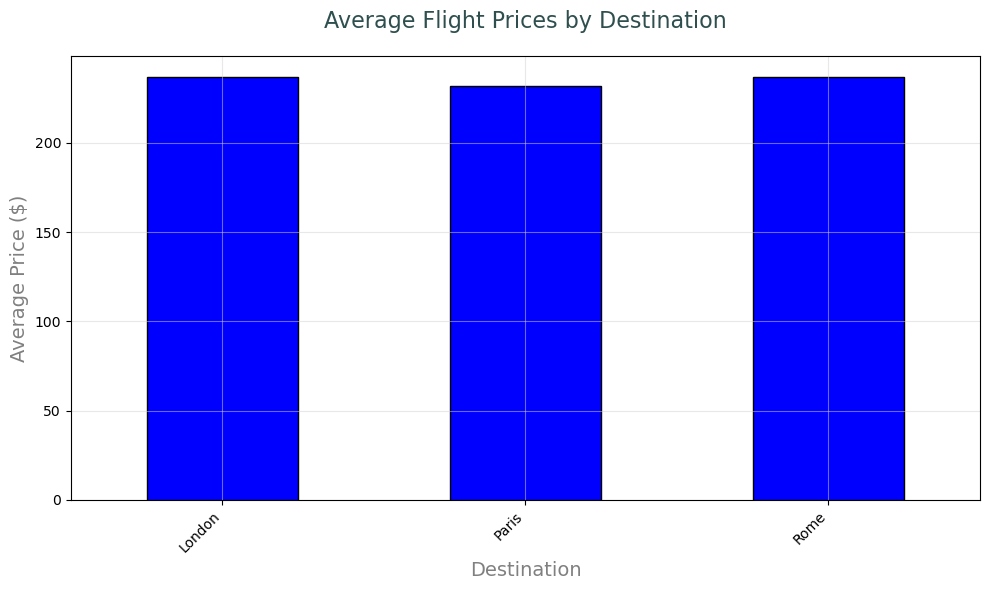

In [17]:
avg_prices_by_destination = cleaned_df.groupby('Destination')['Price'].mean()
plt.figure(figsize=(10, 6))
avg_prices_by_destination.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Average Flight Prices by Destination', fontsize=16, color='darkslategray', pad=20)
plt.xlabel('Destination', fontsize=14, color='gray')
plt.ylabel('Average Price ($)', fontsize=14, color='gray')
plt.grid(True, linestyle='-', color='lightgray', alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/db/xl8268ms1js3ff3nv7003flh0000gn/T/ipykernel_89844/4179202261.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

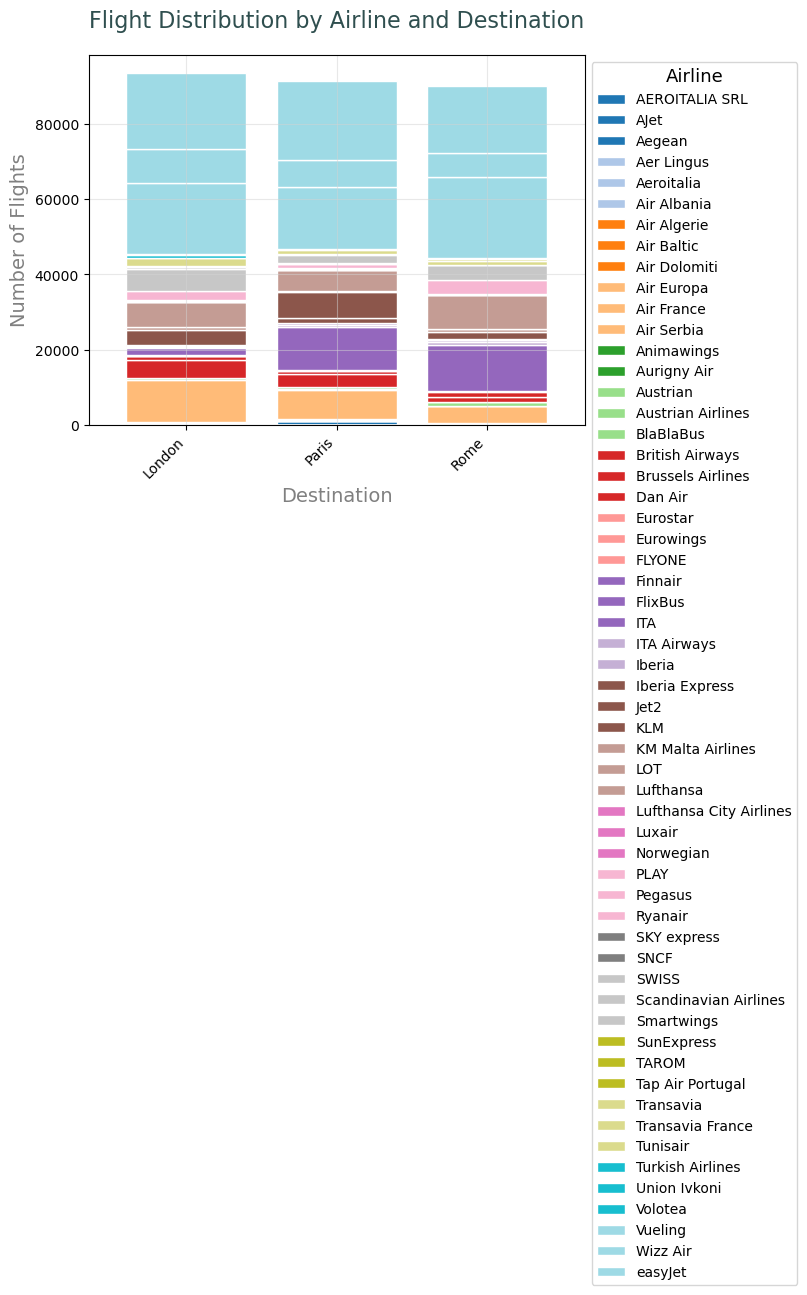

In [18]:
flight_counts = cleaned_df.groupby(['Destination', 'Airline']).size().unstack()
plt.figure(figsize=(10, 6))
flight_counts.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='white', width=0.8)
plt.title('Flight Distribution by Airline and Destination', fontsize=16, color='darkslategray', pad=20)
plt.xlabel('Destination', fontsize=14, color='gray')
plt.ylabel('Number of Flights', fontsize=14, color='gray')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='-', color='lightgray', alpha=0.5)
plt.legend(title='Airline', title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

/var/folders/db/xl8268ms1js3ff3nv7003flh0000gn/T/ipykernel_89844/3145369507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_df, x='Destination', y='Layover', palette='coolwarm')
/var/folders/db/xl8268ms1js3ff3nv7003flh0000gn/T/ipykernel_89844/3145369507.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_df, x='Destination', y='Duration', palette='viridis')


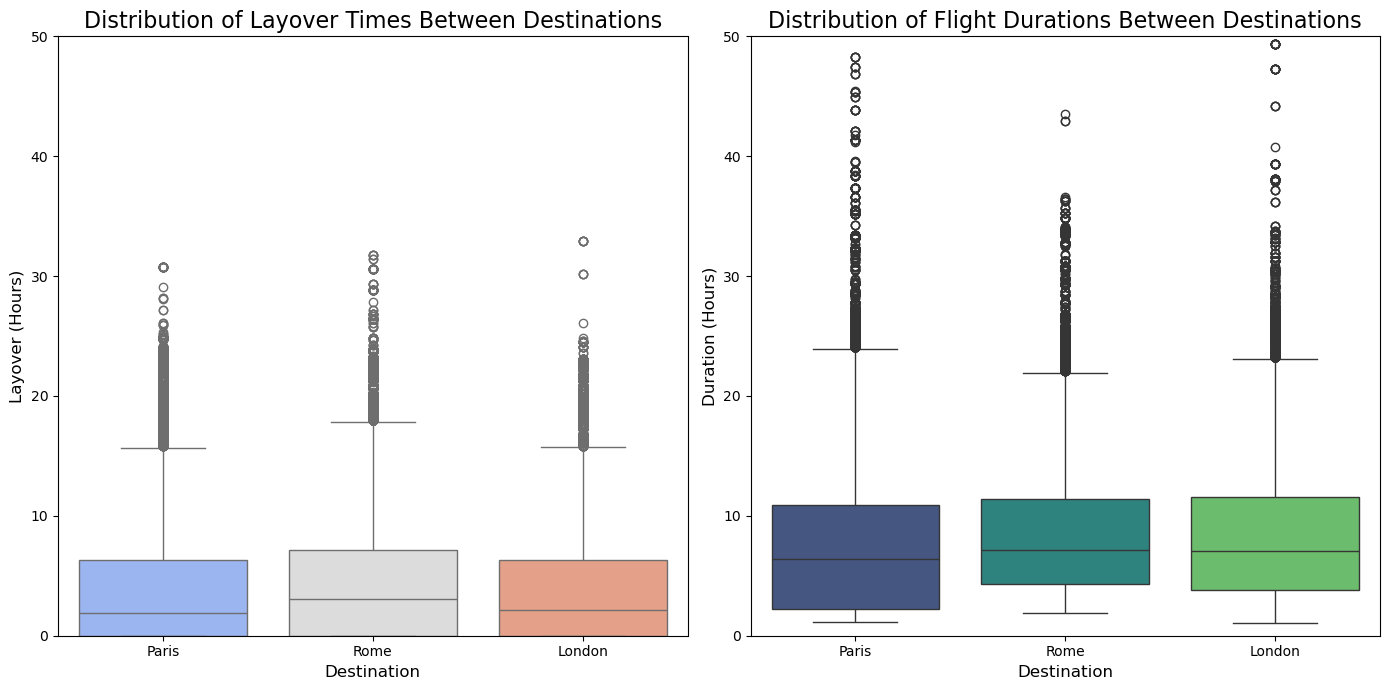

In [19]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=cleaned_df, x='Destination', y='Layover', palette='coolwarm')
plt.title('Distribution of Layover Times Between Destinations', fontsize=16)
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Layover (Hours)', fontsize=12)
plt.ylim(0, 50)  
plt.subplot(1, 2, 2)
sns.boxplot(data=cleaned_df, x='Destination', y='Duration', palette='viridis')
plt.title('Distribution of Flight Durations Between Destinations', fontsize=16)
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Duration (Hours)', fontsize=12)
plt.ylim(0, 50)
plt.tight_layout()
plt.show()

/var/folders/db/xl8268ms1js3ff3nv7003flh0000gn/T/ipykernel_89844/3013770038.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_df, x='Departure Airport', y='Price', palette='coolwarm')


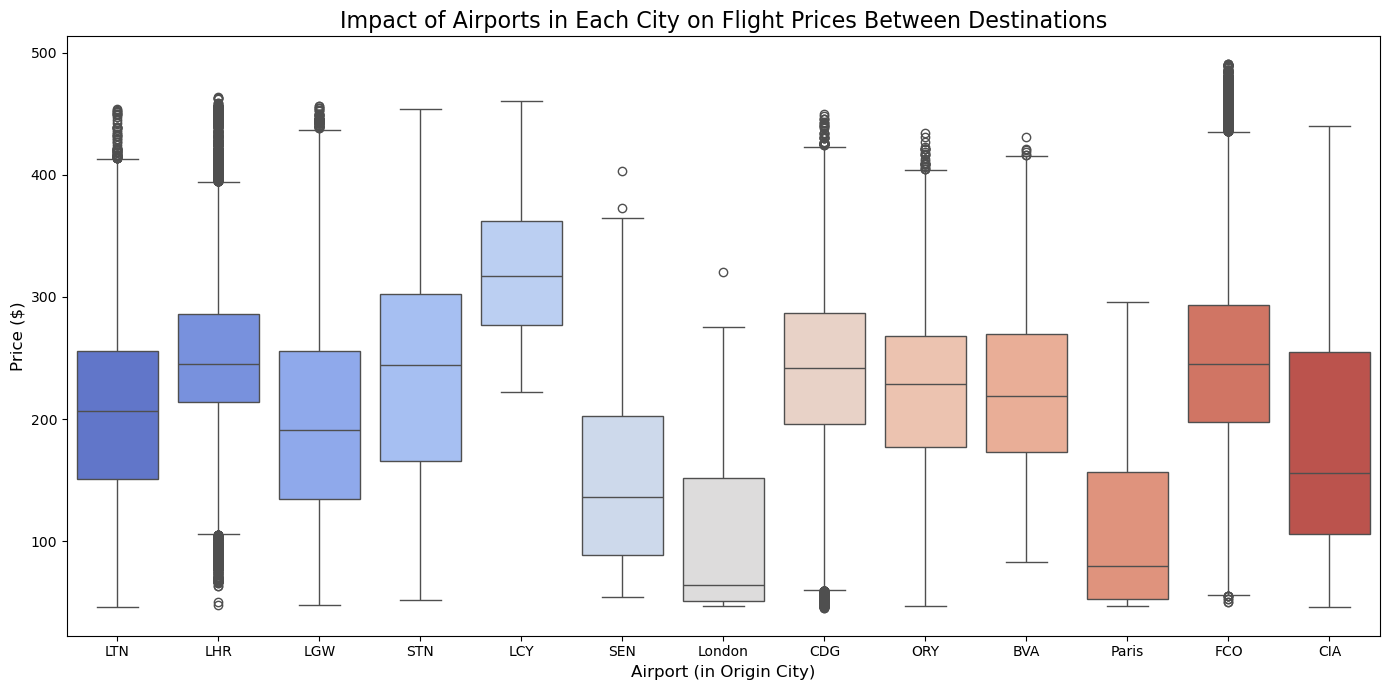

In [20]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=cleaned_df, x='Departure Airport', y='Price', palette='coolwarm')
plt.title('Impact of Airports in Each City on Flight Prices Between Destinations', fontsize=16)
plt.xlabel('Airport (in Origin City)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.tight_layout()
plt.show()

In [21]:
# cleaned_df['Price'] = pd.to_numeric(cleaned_df['Price'], errors='coerce')
# cleaned_df['Layover'] = pd.to_numeric(cleaned_df['Layover'], errors='coerce')
# cleaned_df['Duration'] = pd.to_numeric(cleaned_df['Duration'], errors='coerce')
# cleaned_df['Stops'] = pd.to_numeric(cleaned_df['Stops'], errors='coerce')
# numeric_vars = ['Price', 'Layover', 'Duration', 'Stops']
# g = sns.PairGrid(cleaned_df, vars=numeric_vars, height=2.5)
# g.map_upper(sns.scatterplot)
# g.map_lower(sns.kdeplot, cmap="Blues")
# g.map_diag(sns.histplot, kde_kws={'color': 'black'})
# plt.tight_layout()
# plt.show()

In [23]:
import pandas as pd

# Define file paths
file1 = "/Users/talhakimi/data-science-flights-project/Data/GoogleFlightsAll.csv"
file2 = "/Users/talhakimi/data-science-flights-project/Data/KayakFlightsAll.csv"

# Read CSV files, handling errors gracefully
df1 = pd.read_csv(file1)  # Skip problematic rows
df2 = pd.read_csv(file2)

# Concatenate and remove duplicate rows
df_merged = pd.concat([df1, df2])

# Save the cleaned merged file
output_file = "/Users/talhakimi/data-science-flights-project/Data/AllFlightsData.csv"
df_merged.to_csv(output_file, index=False)

print(f"Merged CSV file has been saved as '{output_file}'")


Merged CSV file has been saved as '/Users/talhakimi/data-science-flights-project/Data/AllFlightsData.csv'


In [24]:
import pandas as pd

dfg = pd.read_csv("/Users/talhakimi/data-science-flights-project/Data/KayakFlightsAll.csv")

# Filter rows where 'Departure Airport' is 'London'
filtered_df = dfg[dfg["Departure Airport"] == "London"]

# Display the filtered DataFrame
filtered_df.head()


,Website,Snapshot date,Airline,Price,TTT,LOS,Origin,Destination,Departure date,Departure Airport,Departure Time,Layover,Stops,Return date,Arrival Airport,Arrival Time,Duration
3376,Kayak Flights,2025-03-05,FlixBus,145,3,2,London,Paris,2025-03-08,London,10:30 pm,0.75,1 change,2025-03-10,ORY,5:10 pm,4.33
3545,Kayak Flights,2025-03-05,BlaBlaBus,77,5,4,London,Paris,2025-03-10,London,8:30 am,0.92,1 change,2025-03-14,CDG,8:05 pm,3.75
3752,Kayak Flights,2025-03-05,SNCF,275,7,1,London,Paris,2025-03-12,London,3:04 pm,0.75,1 change,2025-03-13,Paris,8:09 pm,4.33
3852,Kayak Flights,2025-03-05,BlaBlaBus,98,17,1,London,Paris,2025-03-22,London,8:30 am,0.83,1 change,2025-03-23,CDG,8:05 pm,3.67
4009,Kayak Flights,2025-03-05,SNCF,320,15,1,London,Paris,2025-03-20,London,7:04 am,0.75,1 change,2025-03-21,CDG,11:53 am,4.33
